# *Lecture 19*

# Quantum Wavefunctions in 1-D and 2-D

| |
|:---:|
|Selected Content [From **COMPUTATIONAL PHYSICS**, 3rd Ed, 2015](http://physics.oregonstate.edu/~rubin/Books/CPbook/index.html) <br>RH Landau, MJ Paez, and CC Bordeianu (deceased) <br>Copyrights: <br> [Wiley-VCH, Berlin;](http://www.wiley-vch.de/publish/en/books/ISBN3-527-41315-4/) and [Wiley & Sons, New York](http://www.wiley.com/WileyCDA/WileyTitle/productCd-3527413154.html)<br>  R Landau, Oregon State Unv, <br>MJ Paez, Univ Antioquia,<br> C Bordeianu, Univ Bucharest, 2015.<br> Support by National Science Foundation.|

# Recap of Heat Equation and Time Dependence

Two weeks ago, in Lecture 16, we investigated the numerical solutions for the 1-D parabolic partial differential equation called the **diffusion equation** or **heat equation**:

$$\frac {\partial T(x,t)}{\partial t} = \frac{K}{C\rho}
\frac{\partial ^2 T(x,t)}{\partial x^2}$$

This was our first example of a time-dependent differential equation.

To solve this equation, we converted the differential equation to a finite difference equation:

$$\frac{T(x,t+ \Delta t)-T(x,t)}{\Delta t} = \frac{K}{C\rho}
\frac{T(x+\Delta x,t) -2 T(x,t)+T(x-\Delta x,t) }{(\Delta
x)^2}$$

and then wrote the explicit equation for an update of the points on the discrete $(i,j)$ space-time grid.

$$
 T_{i,j+1} = T_{i,j}+ \eta
\left[T_{i+1,j}-2T_{i,j}+T_{i-1,j}\right], \quad \eta  = \frac{K
\Delta t}{C\rho (\Delta x)^2}$$

<img src="Figures/Figure_20.2.png" width="40%">

We decided that this was not technically a **leapfrog** algorithm because the position was updated for every time step $j$.
Instead, we called it a **time-stepping** algorithm.
The time-stepping algorithm was stable only under certain conditions for $\Delta t$, $\Delta x$, and $K/C\rho$.

The **Crank-Nicolson method** was an improvement that used a central difference approximation for the time derivative, but it resulted in an *implicit* equation for the $T$ values.
The Crank-Nicolson method was stable for all values of $\Delta x$ and $\Delta t$ because it incorporates forward- and backward-differencing at the same time.

(See Chapter 20.4 for details of Crank-Nicolson stability, especially Eqn. 20.33.)

# Schrödinger Equation

## Time-Independent Schrödinger Equation

In Lecture 13, we used the **shooting method** to solve the Time-Independent Schrödinger Equation (TISE) with boundary conditions.

$$\frac{\hbar^2} {2m} \frac{d^2\psi(x)}{dx^2} = (V-E) \psi(x)$$

The ODE solver stepped the solution from an "initial" boundary condition to a "final" boundary condition, given some test initial conditions.
The initial conditions were varied until the "final" boundary condition was satisfied.

## Time-Dependent Schrödinger Equation

Now we will move on to a different parabolic PDE: the time-dependent Schrödinger Equation (TDSE).

$$\begin{align}
i\hbar \ \frac{\partial\psi(x,t)}{\partial t} & =
\hat{H}\psi(x,t)\\
i\hbar \ \frac{\partial\psi(x,t)}{\partial t} & =   - \frac{\hbar^2} {2m}
\frac{\partial^2 \psi(x,t)}{\partial x^2}
+V(x)\psi(x,t)\end{align}$$

We will set $\hbar^2/2m=1$ for simplicity.

If $\psi$ is a pure energy eigenstate of the Hamiltonian, and *the potential is independent of time*, then time-dependent part of $\psi$ is just $e^{-i\omega t}$, and the spatial part is the solution to the TISE.

But if $\psi$ is a combination of energy eigenstates, we have two choices for the numerical solution:
* decompose the $\psi$ into basis set of energy eigenstates, using Fourier methods
* solve the general form directly, using time-stepping solutions in a discrete space-time grid

Note that the TDSE is still subject to boundary conditions, usually at the edges of a potential well or step.

In any case, the time-dependent solution is a complex function with real and imaginary parts.  We will have to remember this when we calculate any probabilities.

## Numerical Methods for Solution

### Explicit Differencing Setup

A simple forward-differencing substitution for the time derivative yields

$$\begin{align}
\frac{\psi_{j+1} - \psi_j}{\Delta t} &= -i H\psi_j \\
\psi_{j+1} &= (1 - iH\Delta t) \psi_j \\
\end{align}$$

This is an explicit formula, but there is a problem.
When the formula is applied over and over for the time stepping, the probability for the wave function is not conserved.
You can see this clearly with the energy eigenvalues $E$:

$$|1-iE\Delta t| = [1+E^2 (\Delta t)^2]^{1/2} > 1$$

In fact, the evolution is unstable for any value of $\Delta t$.

If instead we used the $t_{j+1}$ value of $\psi$ for the second derivative, we would get an implicit formula:

$$\begin{align}
\frac{\psi_{j+1} - \psi_j}{\Delta t} &= -i H\psi_{j+1} \\
\psi_{j+1} - \psi_j &= -i H \Delta t \psi_{j+1} \\
\psi_{j+1} + i H \Delta t \psi_{j+1} &= \psi_j \\
\psi_{j+1} &= \psi_j (1 + iH\Delta t)^{-1} \\
\end{align}$$

This formula does not blow up, but it does not conserve probability, either:

$$|1+iE\Delta t|^{-1} = [1+E^2 (\Delta t)^2]^{-1/2} < 1$$

The middle ground comes from using the average of the spatial derivatives at the two time points:

$$\begin{align}
\frac{\psi_{j+1} - \psi_j}{\Delta t} &= \frac{-i H}{2} (\psi_{j+1} + \psi_j) \\
\psi_{j+1} &= \frac{1}{1+ \frac{i}{2} H \Delta t} \left( 1- \frac{i}{2} H \Delta t \right) \psi_j \\
\end{align}$$


Because $H$ is Hermitian, it is clear that the probability is conserved now:

$$\left|\frac{1-\frac{i}{2}H\Delta t}{1+\frac{i}{2}H\Delta t}\right| = 1$$

(It also happens that this operator matches the exact exponential evolution operator through $\mathcal{O}(\Delta t)^2$, which is better than we might have expected with simple forward-differencing.)

This approach is the analog of the Crank-Nicolson method, which uses results from both forward and backward time steps.
Both approaches lead to a tridiagonal matrix, which can be solved through Gaussian elimination and backward substitution (or with linear algebra packages in Python).

### "Leapfrog" Solution

The complex $\psi$ can be split into two parts: purely real $R$ and purely imaginary $I$.

In this form, there are two Schrödinger equations to solve:

$$\begin{align}
i\ \frac{\partial R(x,t)}{\partial t} & = H R(x,t)\\
i\ \frac{\partial I(x,t)}{\partial t} & = H I(x,t)
\end{align}$$

The factors of $i$ effectively mix up the real and imaginary parts so that 

$$
\begin{align}
\frac{\partial R(x,t)}{\partial t} &= -\frac{\partial^2 I(x,t)}{\partial x^2} + VI(x,t) \\
\frac{\partial I(x,t)}{\partial t} &= +\frac{\partial^2 R(x,t)}{\partial x^2} - VR(x,t)
\end{align}$$

The discretization of $R$ and $I$ can happen, in principle, on the same space-time grid with spacings $\Delta x$ and $\Delta t$.

The algorithm for solving the equations is based on the finite differences for the first and second derivatives:

$$\frac{\partial \psi}{\partial t} = \frac{\psi \left(x,t+\frac{1}{2}\Delta t \right) - \psi \left(x,t-\frac{1}{2}\Delta t \right)}{\Delta t}$$

$$\frac{\partial^2 \psi}{\partial x^2} = \frac{\psi(x+\Delta x, t) - 2 \psi (x,t) + \psi(x-\Delta x, t)}{(\Delta x)^2}$$

These derivatives are substituted into the Schrödinger equation to give

$$\begin{align}
R\left(x,t+\frac{1}{2} \Delta t\right) = R\left(x,t-\frac{1}{2}
\Delta t\right) +[4\alpha +V(x)  \Delta
t]I(x,t) -2\alpha [I(x+\Delta x,t)+I(x-\Delta
x,t)]\end{align}$$

where $\alpha = {\Delta t } /{2(\Delta x)^2}$.

In the position notation of the grid, we then have the explicit equations for updating $R$ and $I$ at time step $n+1$:

$$
R^{n+1}_i = R^{n}_i -2\alpha\left(I^n_{i+1} + I^n_{i-1} -2 I^n_i \right) + V_i \Delta t I^n_i$$

$$
I^{n+1}_i  = I^{n}_i + 2 \alpha\left(R^n_{i+1} +R^n_{i-1} - 2 R^n_i \right)- V_i \Delta t R^n_i$$

We can see that both $R$ and $I$ are updated after a full time step, but the evaluations of $R$ and $I$ are performed at different times.
They are shifted by $\Delta t/2$.

That is, the real part
$R$ is determined at times $0$, $\Delta t, \ldots$, and the imaginary part $I$ at
$ \frac{1}{2}\Delta t$, $\frac{3}{2}\Delta t,\ldots$.
Since we are only keeping the most recent evaluations of $R$ and $I$, this works perfectly.

I call this the real *leapfrog* algorithm because the updates of $R$ and $I$ are interleaved, just as they would have been for position and velocity in the standard *leapfrog*.

It is interesting to go back and see that the difference in time steps comes about because we have a first-order time derivative and a second-order spatial derivative.

### Implementation

In the following example, a particle wave packet is in a harmonic oscillator potential.
We can track the evolution of the wave packet as it bounces off of the potential walls.

The probability (norm) calculated in this code is 

$$|\psi|^2 = R^2 + I^2$$

A more precise value of the probability would use evaluations at three different times instead of two:

$$
 P(t)=\begin{cases}
 R^2(t)+I\left(t+ \frac{\Delta t} {2}\right)I\left(t- \frac{\Delta t} {2}\right),
        & \mbox{for integer}\ t,\\
        I^2(t)+R\left(t+ \frac{\Delta t} {2}\right)R\left(t- \frac{\Delta t} {2}\right),
 & \mbox{for half-integer}\ t.
 \end{cases}$$
 
The "slicing" in this Python code allows us to update the $R$ and $I$ functions at every point in space at once, taking advantage of Python built-in vectorization for simple functions.

<IPython.core.display.Javascript object>


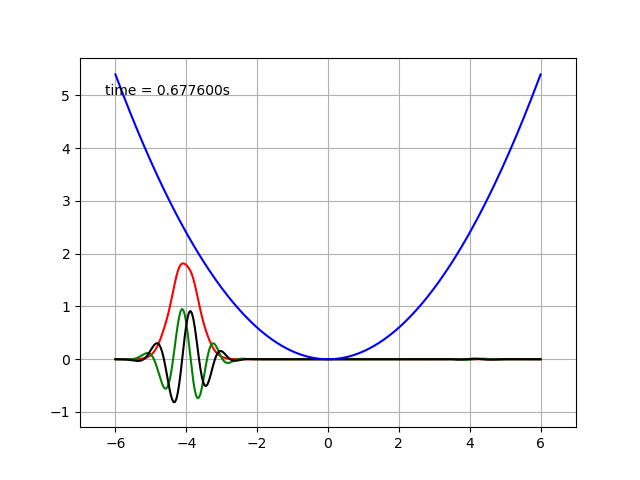

In [18]:
% matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate
import matplotlib.animation as animation    

dx = 0.04
dx2 = dx*dx
k0 = 5.5*np.pi
dt = dx2/10.0

xmax = 6.0
xs = np.arange(-xmax,xmax+dx/2,dx)                     

psr = np.exp(-0.5*(xs/0.5)**2) * np.cos(k0*xs)                # Initial RePsi
psi = np.exp(-0.5*(xs/0.5)**2) * np.sin(k0*xs)                # Initial ImPsi
v   = 15.0*pow(xs,2)

fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=True, xlim=(-xmax-1.,xmax+1))
ax.grid()

P_curve, = ax.plot(xs, 2*(psr**2 + psi**2), 'r-')
R_curve, = ax.plot(xs, psr, 'g-')
I_curve, = ax.plot(xs, psi, 'k-')
V_curve = ax.plot(xs, v/100, 'b-')
time_template = 'time = %fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def init():
    P_curve.set_ydata(2*(psr**2 + psi**2))
    R_curve.set_ydata(psr)
    I_curve.set_ydata(psi)
    time_text.set_text('')
    return P_curve, R_curve, I_curve, time_text

def animate(i):
    psr[1:-1] = psr[1:-1] - \
      (dt/dx2)*(psi[2:] + psi[:-2] - 2*psi[1:-1]) + dt*v[1:-1]*psi[1:-1]
    psi[1:-1] = psi[1:-1] + \
      (dt/dx2)*(psr[2:] + psr[:-2] - 2*psr[1:-1]) - dt*v[1:-1]*psr[1:-1]
    P_curve.set_ydata(2*(psr**2 + psi**2))
    R_curve.set_ydata(psr)
    I_curve.set_ydata(psi)
    time_text.set_text(time_template % (i*dt))
    return P_curve, R_curve, I_curve, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, 10000),
                              interval=5, blit=True, init_func=init)

There are few things to note in this example:
* Probability curve has been artificially increased for clarity
* Real and imaginary parts track closely together
* Particle moves slowly at the edges and quickly in the center

The next example shows the behavior at the $x^4$ potential, which starts to approximate the square well.

In this example, we should be careful with the $\Delta t$, or, more precisely, $\Delta t / (\Delta x)^2$.
* Exercise: change $\Delta t$ to ensure a stable solution

<IPython.core.display.Javascript object>


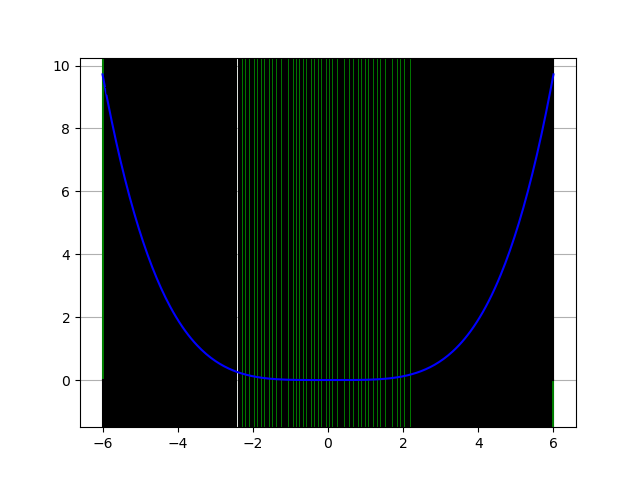

In [55]:
% matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate
import matplotlib.animation as animation    

dx = 0.04
dx2 = dx*dx
k0 = 10.5*np.pi
dt = dx2/15.0

xmax = 6.0
xs = np.arange(-xmax,xmax+dx/2,dx)                     

psr = np.exp(-0.5*(xs/0.5)**2) * np.cos(k0*xs)                # Initial RePsi
psi = np.exp(-0.5*(xs/0.5)**2) * np.sin(k0*xs)                # Initial ImPsi
v   = 15.0*pow(xs,4)

fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=True)
ax.grid()

P_curve, = ax.plot(xs, 4*(psr**2 + psi**2), 'r-')
R_curve, = ax.plot(xs, psr, 'g-')
I_curve, = ax.plot(xs, psi, 'k-')
V_curve = ax.plot(xs, v/2000, 'b-')
time_template = 'time = %fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def init():
    P_curve.set_ydata(4*(psr**2 + psi**2))
    R_curve.set_ydata(psr)
    I_curve.set_ydata(psi)
    time_text.set_text('')
    return P_curve, R_curve, I_curve, time_text

def animate(i):
    psr[1:-1] = psr[1:-1] - \
      (dt/dx2)*(psi[2:] + psi[:-2] - 2*psi[1:-1]) + dt*v[1:-1]*psi[1:-1]
    psi[1:-1] = psi[1:-1] + \
      (dt/dx2)*(psr[2:] + psr[:-2] - 2*psr[1:-1]) - dt*v[1:-1]*psr[1:-1]
    P_curve.set_ydata(4*(psr**2 + psi**2))
    R_curve.set_ydata(psr)
    I_curve.set_ydata(psi)
    time_text.set_text(time_template % (i*dt))
    return P_curve, R_curve, I_curve, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, 10000),
                              interval=1, blit=True, init_func=init)

In the next example, we create a true square well and see how the particle behaves when it encounters the wall.

Try the following cases:
* low $V$ wall
* high $V$ wall
* "infinite" $V$ wall

<IPython.core.display.Javascript object>


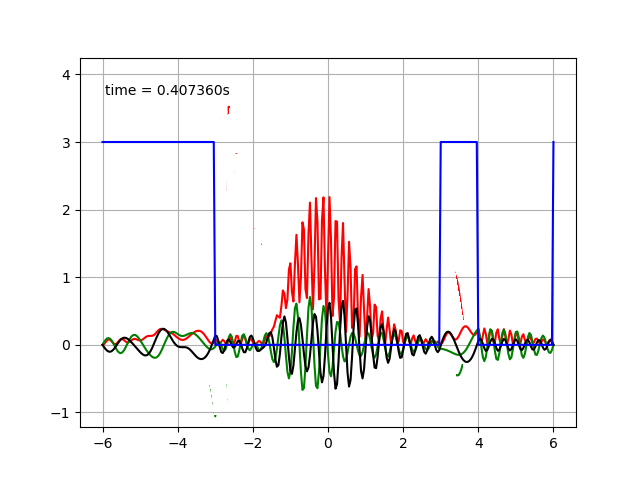

In [52]:
% matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate
import matplotlib.animation as animation    

dx = 0.04
dx2 = dx*dx
k0 = 5.5*np.pi
dt = dx2/10.

xmax = 6.0
xs = np.arange(-xmax,xmax+dx/2,dx)                     

psr = np.exp(-0.5*(xs/0.5)**2) * np.cos(k0*xs)                # Initial RePsi
psi = np.exp(-0.5*(xs/0.5)**2) * np.sin(k0*xs)                # Initial ImPsi
v   = xs.copy()

for i in range(len(xs)):
    if (abs(xs[i]) < 3.0):
        v[i] = 0.
    elif (abs(xs[i] > 4.0 and abs(xs[i] < 6.0))):
        v[i] = 0.
    else:
        v[i] = 3e2
    
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=True)
ax.grid()

P_curve, = ax.plot(xs, 4*(psr**2 + psi**2), 'r-')
R_curve, = ax.plot(xs, psr, 'g-')
I_curve, = ax.plot(xs, psi, 'k-')
V_curve = ax.plot(xs, v/1e2, 'b-')
time_template = 'time = %fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def init():
    P_curve.set_ydata(4*(psr**2 + psi**2))
    R_curve.set_ydata(psr)
    I_curve.set_ydata(psi)
    time_text.set_text('')
    return P_curve, R_curve, I_curve, time_text

def animate(i):
    psr[1:-1] = psr[1:-1] - \
      (dt/dx2)*(psi[2:] + psi[:-2] - 2*psi[1:-1]) + dt*v[1:-1]*psi[1:-1]
    psi[1:-1] = psi[1:-1] + \
      (dt/dx2)*(psr[2:] + psr[:-2] - 2*psr[1:-1]) - dt*v[1:-1]*psr[1:-1]
    P_curve.set_ydata(4*(psr**2 + psi**2))
    R_curve.set_ydata(psr)
    I_curve.set_ydata(psi)
    time_text.set_text(time_template % (i*dt))
    return P_curve, R_curve, I_curve, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, 10000),
                              interval=5, blit=True, init_func=init)

# 2-D Schrödinger equation

We are somewhat limited in 3-D animations for a 2-D wave function, but it is useful to have the explicit equations for $R$ and $I$ in 2 dimensions.

In this case, $i,j$ are the indices on the discrete position grid in $(x,y)$, and $n$ is again the index of the time variable.

$$\begin{align}
R^{n+1}_{i,j} &=  R^{n}_{i,j}-2 \left[\alpha
    \left(I^n_{i+1,j}+I^n_{i-1,j}
+I^n_{i,j+1}+I^n_{i,j-1}\right) - \left(4\alpha +\frac{1}{2}\Delta t
    V_{i,j}\right)I^n_{i,j}  \right] \\
 &= R^{n}_i -\frac{\Delta t}{(\Delta x)^2} \left(I^n_{i+1,j}+I^n_{i-1,j}
+I^n_{i,j+1}+I^n_{i,j-1} - 4 I^n_{i,j} \right) + V_{ij} \Delta t I^n_{i,j} \\
    I^{n+1}_{i,j}
    & =  I^{n-1}_{i,j}+2\left[\alpha
    \left(R^n_{i+1,j}+R^n_{i-1,j}+R^n_{i,j+1}
+R^n_{i,j-1}\right) - \left(4\alpha+\frac{1}{2}\Delta t
    V_{i,j}\right)R^n_{i,j}\right] \\
&= I^{n}_i +\frac{\Delta t}{(\Delta x)^2} \left(R^n_{i+1,j}+R^n_{i-1,j}
+R^n_{i,j+1}+R^n_{i,j-1} - 4 R^n_{i,j} \right) - V_{ij} \Delta t R^n_{i,j} \\
 \end{align}$$

Compare to the 1-D results

$$\begin{align}
R^{n+1}_i& = R^{n}_i - 2\left[ \alpha\left(I^n_{i+1}
+I^n_{i-1}\right) - \left(2\alpha + \frac{1}{2} V_i \Delta t\right)I^n_i
\right] \\
I^{n+1}_i& = I^{n}_i + 2 \left[\alpha\left(R^n_{i+1}
+R^n_{i-1}\right)-\left(2 \alpha+ \frac{1}{2} V_i \Delta
t\right)R^n_i\right]\end{align}$$

The main difference is that we subtract 4 times the central value in the grid instead of 2, because we are taking two finite differences (in $x$ and $y$) instead of one.

-4.440892098500626e-16 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.] 399.99999999999966


<IPython.core.display.Javascript object>


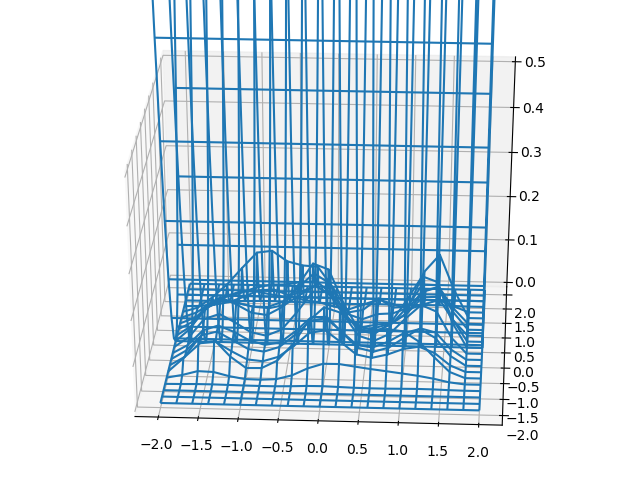

In [74]:
% matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate
import matplotlib.animation as animation    
from mpl_toolkits.mplot3d import Axes3D

dx = 0.20
dy = dx
dx2 = dx*dx
dy2 = dy*dy
k0 = 5.5*np.pi
dt = dx2/40.

xmax = 2.0
ymax = xmax
xs = np.arange(-xmax,xmax+dx/2,dx)
ys = np.arange(-ymax,ymax+dy/2,dy)                     
xm, ym = np.meshgrid(xs, ys)

psr = np.exp(-0.5*(xm/0.5)**2) * np.exp(-0.5*(ym/0.5)**2) * np.cos(k0*xm) * np.cos(k0*ym)
psi = np.exp(-0.5*(xm/0.5)**2) * np.exp(-0.5*(ym/0.5)**2) * np.sin(k0*xm) * np.sin(k0*ym)
v   = 100.*pow(ym,2)
#v = np.zeros((len(xs),len(ys))) + 0.3*pow(ym,2)
print(xs[10], ym[20], v[20][20])
    
fig = plt.figure()
ax = Axes3D(fig)
ax.grid()
ax.set_zlim(0., 0.5)

def init():
    animate.vwframe = ax.plot_wireframe(xm, ym, v/200)
    animate.pwframe = ax.plot_wireframe(xm, ym, psr**2 + psi**2)
    return animate.vwframe, animate.pwframe

def animate(i):
# This fancy indexing does not work: no motion in y
    ax.collections.remove(animate.pwframe)
    psr[1:-2][1:-2] = psr[1:-2][1:-2] - \
      (dt/dx2)*(psi[2:-1][1:-2] + psi[0:-3][1:-2] + psi[1:-2][2:-1] + psi[1:-2][0:-3] - 4*psi[1:-2][1:-2]) + \
        dt*v[1:-2][1:-2]*psi[1:-2][1:-2]        
    psi[1:-2][1:-2] = psi[1:-2][1:-2] + \
      (dt/dx2)*(psr[2:-1][1:-2] + psr[0:-3][1:-2] + psr[1:-2][2:-1] + psr[1:-2][0:-3] - 4*psr[1:-2][1:-2]) - \
        dt*v[1:-2][1:-2]*psr[1:-2][1:-2]
    animate.pwframe = ax.plot_wireframe(xm, ym, psr**2 + psi**2)
    return animate.pwframe

def animate2(i):
    ax.collections.remove(animate.pwframe)
    for i in range(1,len(xs)-2):
        for j in range(1, len(ys)-2):
            psr[i][j] = psr[i][j] - \
            (dt/dx2)*(psi[i+1][j] + psi[i-1][j] + psi[i][j+1] + psi[i][j-1] - 4*psi[i][j]) + \
            dt*v[i][j]*psi[i][j]
            
            psi[i][j] = psi[i][j] + \
            (dt/dx2)*(psr[i+1][j] + psr[i-1][j] + psr[i][j+1] + psr[i][j-1] - 4*psr[i][j]) - \
            dt*v[i][j]*psr[i][j]
    animate.pwframe = ax.plot_wireframe(xm, ym, psr**2 + psi**2)
    return animate.pwframe

ani = animation.FuncAnimation(fig, animate2, np.arange(1, 10000),
                              interval=25, blit=True, init_func=init)